In [1]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

from sklearn.datasets import load_files

twenty_train = load_files(container_path='/Users/hendrik.frentrup/Desktop/datasets/20news-bydate/20news-bydate-train',
                                categories=categories, shuffle=True, random_state=42) #, encoding='unicode')
print "Data loaded"

Data loaded


In [2]:
print "Target names: ", twenty_train.target_names
print "# of training data: data {0} | target {1} ".format( len(twenty_train.data), len(twenty_train.target) )
print "="*10+"Sample Header"+"="*10
print("\n".join(twenty_train.data[0].split("\n")[:3]))
print "="*33
print "="*10+"Sample Target"+"="*10
print(twenty_train.target_names[twenty_train.target[0]])
print "="*33
print "First 10 targets:", twenty_train.target[0:10]

Target names:  ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
# of training data: data 2257 | target 2257 
==========Sample Header==========
From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fung)
Subject: Re: looking for circle algorithm faster than Bresenhams
Organization: Department of Computer Science, The University of Western
==========Sample Target==========
comp.graphics
First 10 targets: [1 0 2 2 0 1 1 3 3 2]


In [58]:
print twenty_train.data[2][:400]+"..."

From: dyer@spdcc.com (Steve Dyer)
Subject: Re: Thrush ((was: Good Grief! (was Re: Candida Albicans: what is it?)))
Organization: S.P. Dyer Computer Consulting, Cambridge MA
Lines: 34

In article <21APR199308571323@ucsvax.sdsu.edu> mccurdy@ucsvax.sdsu.edu (McCurdy M.) writes:
>Dyer is beyond rude. 

Yeah, yeah, yeah.  I didn't threaten to rip your lips off, did I?
Snort.

>There have been and alway...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(decode_error='ignore')
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35787)

In [72]:
print "="*10+"Vectoriser settings"+"="*10
count_vect
print "="*10+"Example of vecorizer"+"="*9
analyze = count_vect.build_analyzer()
print analyze(twenty_train.data[2])[:25]
print "="*10+"Resulting dictionary"+"="*9
print "Number of words in 'dictionary': ", len(count_vect.get_feature_names())
print "="*10+"Get index of word"+"="*12
print "Index of 'algorithm': ", count_vect.vocabulary_.get(u'algorithm')

==========Vectoriser settings==========
==========Example of vecorizer=========
[u'from', u'dyer', u'spdcc', u'com', u'steve', u'dyer', u'subject', u're', u'thrush', u'was', u'good', u'grief', u'was', u're', u'candida', u'albicans', u'what', u'is', u'it', u'organization', u'dyer', u'computer', u'consulting', u'cambridge', u'ma']
==========Resulting dictionary=========
Number of words in 'dictionary':  35787
==========Get index of word============
Index of 'algorithm':  4690


In [170]:
from collections import Counter
Counter(analyze(twenty_train.data[0])).most_common(20)

[(u'graeme', 13),
 (u'of', 8),
 (u'labtam', 6),
 (u'computer', 6),
 (u'and', 6),
 (u'to', 5),
 (u'yee', 4),
 (u'khun', 4),
 (u'ontario', 4),
 (u'graphics', 4),
 (u'the', 4),
 (u'uwo', 3),
 (u'for', 3),
 (u'length', 3),
 (u'oz', 3),
 (u'ca', 3),
 (u'au', 3),
 (u'csd', 3),
 (u'you', 3),
 (u'algorithm', 3)]

In [163]:
feature_id_map={}
for f in count_vect.get_feature_names():
    feature_id_map[count_vect.vocabulary_.get(f)]=f
feature_id_map[35786]

u'zzz'

In [165]:
print count_vect.get_feature_names()[0:15]
print [ (e, feature_id_map[e]) for e in feature_id_map.keys()[0:15] ]

[u'00', u'000', u'0000', u'0000001200', u'000005102000', u'0001', u'000100255pixel', u'00014', u'000406', u'0007', u'000usd', u'0010', u'001004', u'0010580b', u'001125']
[(0, u'00'), (1, u'000'), (2, u'0000'), (3, u'0000001200'), (4, u'000005102000'), (5, u'0001'), (6, u'000100255pixel'), (7, u'00014'), (8, u'000406'), (9, u'0007'), (10, u'000usd'), (11, u'0010'), (12, u'001004'), (13, u'0010580b'), (14, u'001125')]


In [150]:
word_counts = X_train_counts.sum(axis=0)
print word_counts.shape
X_train_counts[0,:]

(1, 35787)


<1x35787 sparse matrix of type '<type 'numpy.int64'>'
	with 164 stored elements in Compressed Sparse Row format>

In [168]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pl
from operator import itemgetter

arr_word_counts=np.asarray(word_counts)[0]
word_count_dict = dict(zip(count_vect.get_feature_names(), arr_word_counts))
    
arr_word_counts.sort()
word_count_dict = sorted(word_count_dict.items(), key=itemgetter(1), reverse=True)
print arr_word_counts
print word_count_dict

[    1     1     1 ..., 17222 17660 29825]
[(u'zzz', 29825), (u'zz', 17660), (u'zyxel', 17222), (u'zyklon', 13017), (u'zyeh', 12343), (u'zwart', 11226), (u'zvonko', 10723), (u'zvi', 8447), (u'zus', 6157), (u'zurlo', 5962), (u'zurich', 5285), (u'zur', 5063), (u'zumder', 4898), (u'zug', 4877), (u'zues', 4769), (u'zubkoff', 4675), (u'zt', 4218), (u'zsoft', 4015), (u'zrz', 3709), (u'zorn', 3655), (u'zorg', 3453), (u'zorasterism', 3432), (u'zopfi', 3208), (u'zooms', 3020), (u'zooming', 2818), (u'zoom', 2674), (u'zool', 2556), (u'zooid', 2548), (u'zoo', 2472), (u'zonker', 2464), (u'zone', 2448), (u'zonal', 2393), (u'zombie', 2353), (u'zoloft', 2312), (u'zolft', 2232), (u'zolf', 2216), (u'zola', 2193), (u'zoerasterism', 2192), (u'zmodem', 2191), (u'zlumber', 2186), (u'zisfein', 2172), (u'zirkel', 2148), (u'zippy', 2143), (u'zipped', 2093), (u'zip', 2000), (u'zionist', 1925), (u'zion', 1912), (u'zinc', 1802), (u'zimmerman', 1793), (u'zillions', 1791), (u'zilch', 1742), (u'zikopoulos', 1671), (

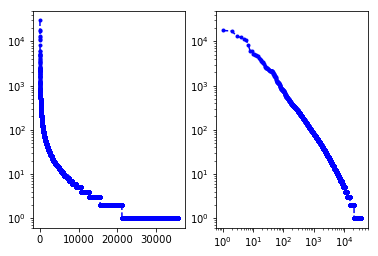

In [134]:
pl.subplot(121)
pl.plot(arr_word_counts[::-1], 'b.--')
pl.yscale('log')
pl.subplot(122)
pl.loglog(arr_word_counts[::-1], 'b.--')
pl.show()


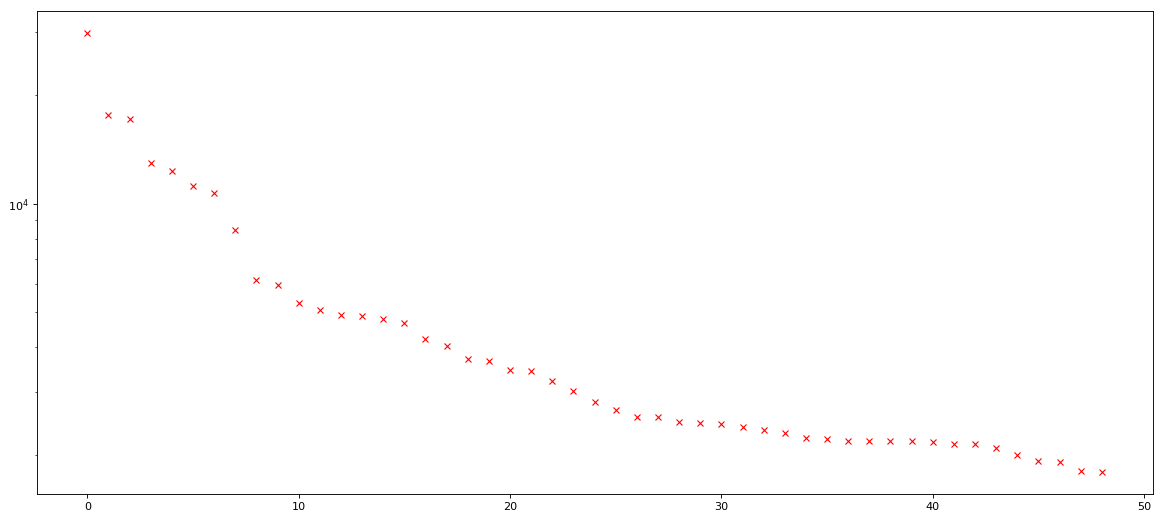

In [142]:
fig=pl.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
pl.plot(arr_word_counts[-1:-50:-1], 'rx')
pl.yscale('log')
pl.show()

In [130]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35787)

In [171]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35787)

In [172]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [173]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [176]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(decode_error='ignore')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [177]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [180]:
for doc, category in zip(docs_new, text_clf.predict(docs_new)):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics
